In [15]:
import os, sys

import numpy  as np
import pandas as pd

from PIL import Image, ImageFilter

import matplotlib.pyplot as plt

import generate_image_lists as giList

%matplotlib inline

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)

In [ ]:
# Run multiple steps to process and alter an image
def process_image_rgb(
                        inp_image              , # Either PIL image object or path to image
                        resize_image   = False , # Force an image size
                        blur_image     = False , # Blur the image
                        pool_image     = False , # Crop the image
                        resize_shape   = []    , # Forced size of image if resizing, WxH
                        kernel_size    = 5     , # Box blur kernel size, 3x3 or 5x5 option
                        pool_stride    = 2     , # Stride when pooling
                        pool_grid_size = 2     , # Grid size for pooling
                        pool_method    = 'max' , # Method for pooling: max, min, avg, med
                     ):
    
    
    # Check input variables are of types we expect
    _check_inp( resize_image, blur_image, pool_image, resize_shape, kernel_size, pool_stride, pool_grid_size, pool_method )

    
    # Read file if needed
    if   isinstance( inp_image, str ):
        
        if not os.path.exists( inp_image ):
            raise IOError( inp_image + ' is not a valid path to an image' )
        
        raw_img = Image.open( inp_image )
        
    elif isinstance( inp_image, Image.Image ):
        raw_img = inp_image
        
    elif isInstance( inp_image, np.ndarray ):
        raw_img = Image.from
        
    else:
        raise TypeError('inp_image must be path to image or Pillow Image object')


    
    # If user is resizing image, do that here
    if ( resize_image ):
        processed_img = processed_img.resize( resize_shape, Image.ANTIALIAS )

    # Blur the image
    if ( blur_image ):

        # Do square kernel blurring
        processed_img = processed_img.filter( 
                                                ImageFilter.Kernel( 
                                                                    [ kernel_size  ,
                                                                      kernel_size ], 
                                                                  np.ones(kernel_size**2) 
                                                                 ) 
                                            )

    # Extract the data as 1d array, reshape to image dimensions
    img_val_arr = np.array( processed_img.getdata() )
    img_shape   = processed_img.size
    img_val_arr = img_val_arr.reshape( img_shape[::-1] )

    # Pool the data
    if ( pool_image ):
        
        pool_method = pool_method.lower()
        
        img_val_arr = _pool_arr( 
                                 img_val_arr                , 
                                 grid_size = pool_grid_size , 
                                 stride    = pool_stride    ,
                                 kind      = pool_method
                               )
        
    return img_val_arr


In [5]:
RESIZE_IMAGE = [ 
                    True, 

]
RESIZE_SHAPE = [ 
                     [1024,1024],
                     [512,512],
                     [256,256],
               ]

BLUR_IMAGE  = [ 
                    True, 
                    True, 
                    True, 
              ]
KERNEL_SIZE = [
                5,
                5,
                3,
              ]  

POOL_IMAGE     = [ 
                    True, 
                    True, 
                    True, 
                 ]

POOL_STRIDE    = [ 
                    4, 
                    4,
                    4,
                 ]
POOL_GRID_SIZE = [ 
                    4, 
                    4,
                    4,
                 ]
POOL_METHOD    = [ 
                    'max', 
                    'max',
                    'max',
                 ]

# Need to go line by line, processing images
def process_pipeline(
                        inp_file,
                        new_img_size,
                    ):
    
        

    # First time through, read from file
    # Second time, pass image back through    
    pi_inp    = ing_file

    # Do however many processes
    for j in range( 0, len(RESIZE_IMAGE) ):

        # If we are doing multiple passes, return
        #  a PIL image, except the last time
        ret_pil = False
        if ( 
            ( len(RESIZE_IMAGE)     > 1 ) and 
            (     RESIZE_IMAGE[j]-1 > j )
           ):
            ret_pil = True


        img_arr = ip.process_image(
                                    pi_inp,
                                    resize_image   = RESIZE_IMAGE[j],
                                    resize_shape   = RESIZE_SHAPE[j],
                                    blur_image     = BLUR_IMAGE[j],
                                    kernel_size    = KERNEL_SIZE[j],
                                    pool_image     = POOL_IMAGE[j],
                                    pool_stride    = POOL_STRIDE[j],
                                    pool_grid_size = POOL_GRID_SIZE[j],
                                    pool_method    = POOL_METHOD[j],
                                    conv_greyscale = conv_grey,
                                    ret_pil_img    = ret_pil,
                                  )

        # Any next pases will not need greyscale
        #  and input will change to pil image
        conv_grey = False
        try:
            pi_inp    = Image.fromarray( img_arr.astype(np.uint8) )
        except:
            pass
        
        
    return pd.concat( [my_df, pixel_df], axis=1 )

In [17]:
img_list, label_list = giList.get_white_images_labels()

In [57]:
def arr_from_pil( inp_image ):
    channels = np.array( inp_image )
    r_ch = channels[:,:,0].reshape( inp_image.size[0], inp_image.size[1] )
    g_ch = channels[:,:,1].reshape( inp_image.size[0], inp_image.size[1] )
    b_ch = channels[:,:,2].reshape( inp_image.size[0], inp_image.size[1] )
    
    return np.swapaxes( np.swapaxes( np.array([r_ch,g_ch,b_ch]), 0, 2 ), 0, 1 )

def resize_blur(
                    inp_image              ,
                    size        = [512,512],
                    kernel_size =        5 ,
               ):
    
    # Read file if needed
    if   isinstance( inp_image, str ):
        if not os.path.exists( inp_image ):
            raise IOError( inp_image + ' is not a valid path to an image' )        
        raw_img = Image.open( inp_image )        
    elif isinstance( inp_image, Image.Image ):
        raw_img = inp_image
    else:
        raise TypeError('inp_image must be path to image or Pillow Image object')

    processed_img = raw_img.convert('RGBA')
        
    # Resizing image
    processed_img = processed_img.resize( size, Image.ANTIALIAS )

    # Blur the image
    # Do square kernel blurring
    processed_img = processed_img.filter( 
                                            ImageFilter.Kernel( 
                                                                [ kernel_size  ,
                                                                  kernel_size ], 
                                                              np.ones(kernel_size**2) 
                                                              ) 
                                        )

    img_arr = arr_from_pil( processed_img )
    return img_arr

In [58]:
i = 0

pp_img = resize_blur( img_list[i] )

(512, 512, 3)


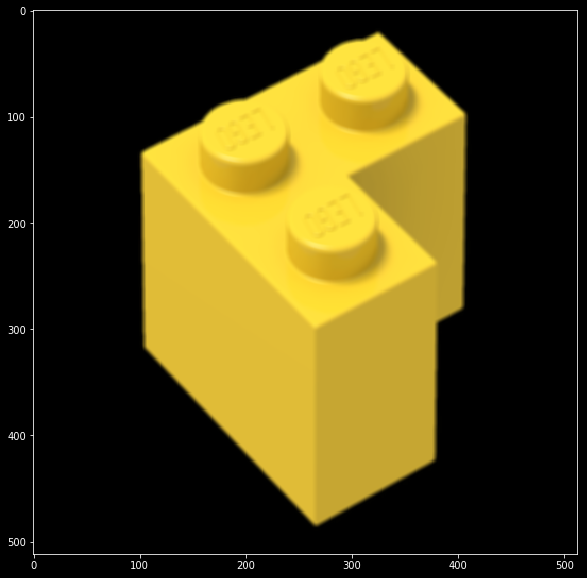

In [59]:
print pp_img.shape
plt.imshow( pp_img )